### Exercise #2.1: Text Tokenization Techniques

**Objective:** Explore Using NLTK's built-in tokenization function to break down a given text into individual words to understand their differences and use cases.

**Description:**
In NLP, tokenization is a crucial first step. It involves splitting text into meaningful elements called tokens, which can be words, phrases, or symbols. This exercise will guide you through implementing different tokenization techniques using Python.

**Tasks:**

1. **NLTK Word Tokenization:**
   - Use `nltk.tokenize.word_tokenize` to tokenize the given sentence: *Dr. Smith's e-mail: dr.smith.2023@smu.edu.sg is outdated. Update ASAP!!!*

2. **Regular Expression Tokenization:**
   - Use `nltk.tokenize.regexp_tokenize` with a specific pattern to capture only word characters.
   - Use another pattern to capture only digits.

3. **WordPunct Tokenization:**
   - Use `nltk.tokenize.WordPunctTokenizer` to tokenize the sentence. This method captures punctuation separately.

4. **Blank Line Tokenization:**
   - Use `nltk.tokenize.BlanklineTokenizer` to tokenize a multiline string as shown in the following code.

**Requirements:**
- Import necessary modules from NLTK as shown in the example.

**Advanced Tasks:**

   - Analyze the output from the basic task to identify tokenization errors or shortcomings, especially with complex text elements like emails, URLs, abbreviations, and non-English words.
   - Propose and implement enhancements or corrections to improve tokenization performance using regular expressions or custom logic.

**Note:** The advanced task is an additional task. If you're interested in delving deeper, you can choose to complete it.



In [ ]:
# for ensureing the nessary resources are available
import nltk

nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt')
nltk.download('punkt_tab')

In [70]:
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize, wordpunct_tokenize, blankline_tokenize


simple_input_text = """Dr. Smith's e-mail: dr.smith.2023@smu.edu.sg is outdated. Update ASAP!!!"""
# Task 1: NLTK Word Tokenization

def nltk_work_tokenization(text):
    """The answers are in the following code block"""
    raise NotImplementedError("You need to implement nltk work tokenization function here")

word_tokens = nltk_work_tokenization(simple_input_text)
print("Word Tokenization:", word_tokens, "\n")

# Task 2: Regular Expression Tokenization
# Capture only characters

def nltk_regex_word_tokenization(text):
    """The answers are in the following code block"""
    raise NotImplementedError("You need to implement nltk regex word tokenization (characters only) function here")

regex_word_tokens = nltk_regex_word_tokenization(simple_input_text)
print("Regex Word Tokenization (characters only):", regex_word_tokens, "\n")

# Capture only digits (demonstrative purpose, no digits in simple_input_text)
def nltk_digital_regex_word_tokenization(text):
    """The answers are in the following code block"""
    raise NotImplementedError("You need to implement nltk regex word tokenization (digits only) function here")


regex_digit_tokens = nltk_digital_regex_word_tokenization(simple_input_text)
print("Regex Digit Tokenization (digits only):", regex_digit_tokens, "\n")

# Task 3: WordPunct Tokenization
def nltk_word_punct_tokenization(text):
    """The answers are in the following code block"""
    raise NotImplementedError("You need to implement nltk word punct tokenization function here")

word_punct_tokens = nltk_word_punct_tokenization(simple_input_text)
print("WordPunct Tokenization:", word_punct_tokens, "\n")

# Task 4: Blank Line Tokenization
complex_input_text = """
Dr. Smith's e-mail: dr.smith.2023@smu.edu.sg is outdated. Update ASAP!!!

Also, check out his latest on arXiv:2022.12345.

BTW, he's in the café discussing NLP.
"""

def nltk_blankline_tokenization(text):
    """The answers are in the following code block"""
    raise NotImplementedError("You need to implement nltk blankline tokenization function here")

blankline_tokens = nltk_blankline_tokenization(complex_input_text)
print("Blank Line Tokenization:")
for token in blankline_tokens:
    print(f"'{token.strip()}'")

Word Tokenization: ['Dr.', 'Smith', "'s", 'e-mail', ':', 'dr.smith.2023', '@', 'smu.edu.sg', 'is', 'outdated', '.', 'Update', 'ASAP', '!', '!', '!'] 

Regex Word Tokenization (characters only): ['Dr', 'Smith', 's', 'e', 'mail', 'dr', 'smith', '2023', 'smu', 'edu', 'sg', 'is', 'outdated', 'Update', 'ASAP'] 

Regex Digit Tokenization (digits only): ['2023'] 

WordPunct Tokenization: ['Dr', '.', 'Smith', "'", 's', 'e', '-', 'mail', ':', 'dr', '.', 'smith', '.', '2023', '@', 'smu', '.', 'edu', '.', 'sg', 'is', 'outdated', '.', 'Update', 'ASAP', '!!!'] 

Blank Line Tokenization:
'Dr. Smith's e-mail: dr.smith.2023@smu.edu.sg is outdated. Update ASAP!!!'
'Also, check out his latest on arXiv:2022.12345.'
'BTW, he's in the café discussing NLP.'


### Exercise #2.2: Analyzing Data in Style Transfer Corpus

**Objective:** Develop a comprehensive understanding of text preprocessing, analysis, and visualization techniques using NLTK tool in Python.

**Description:**
This exercise involves reading a dataset, preprocessing the text, applying stemming and lemmatization to analysis distribution of terms associated with different stylistic data.

**Tasks:**

1. **Text Tokenization:**
   - Tokenize the text data into individual words using NLTK's (above) tokenization methods.

2. **Text Normalization:**
   - Apply stemming and lemmatization techniques to the tokenized text to reduce words to their base or root form.

**Requirements:**
- Python libraries: `nltk`, `pandas`, `matplotlib`, `wordcloud`
- download Style Transfer Corpus, run:

```bash
cd week-02
sh download_data.sh

```

The stemmed words distribution in positive_corpus:


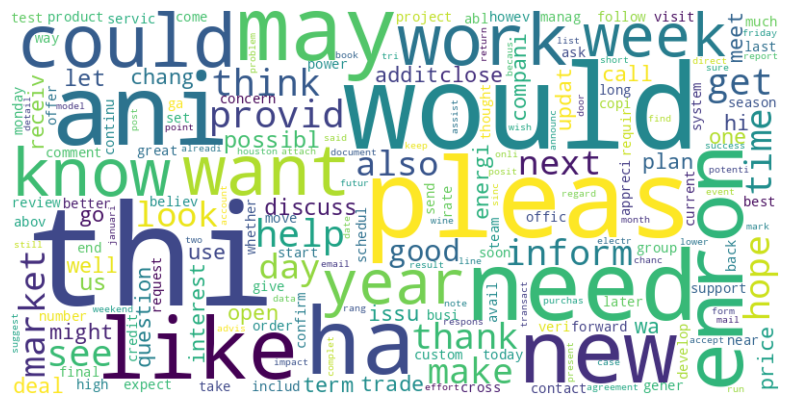




The lemmatized words distribution in positive_corpus:


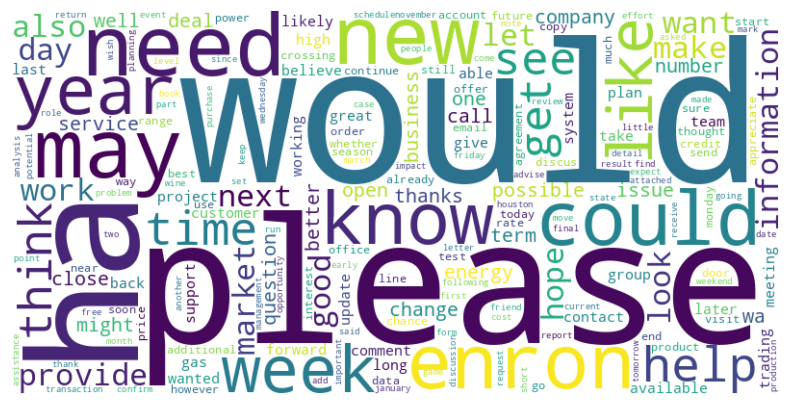

In [71]:
import os
import zipfile
import subprocess
import requests
from io import BytesIO
import nltk
import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import reuters
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# download the politeness.tsv file
def plot_word_cloud(freq_dist):
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(freq_dist)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 不显示坐标轴
    plt.show()

# set the figure configuration
def set_figure_config():
    plt.figure(figsize=(10, 5))
    plt.rc('font', size=12)  
    plt.rc('axes', titlesize=14)  
    plt.rc('axes', labelsize=12)  
    plt.rc('xtick', labelsize=8)  
    plt.rc('ytick', labelsize=8) 

# remove stopwords
def remove_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    clean_tokens = [tok for tok in tokens if len(tok.lower()) > 1 and (tok.lower() not in stopwords)]
    return clean_tokens

# read the data from the politeness.tsv file
def get_data(path):

    df = pd.read_csv(path, sep='\t')

    data = df[df['split'] == 'test']

    positive_data = data[data['style'] == 'P_9']
    negative_data = data[data['style'] == 'P_2']

    positive_corpus = ""
    for i in positive_data['txt'][1:1000]:
        positive_corpus += i + " "

    negative_corpus = ""
    for i in negative_data['txt'][1:1000]:
        negative_corpus += i + " "

    return positive_corpus



positive_corpus = get_data(path='data/politeness.tsv')
# initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


# analyze_text function
def analyze_text(text, method='stemming'):
    

    """Step 1: You need to the tokenization methods to tokenize the text first"""
    """Step 2: You need to apply the stemming or lemmatization method to the tokenized text"""

    """The answers are in the following code block"""
    raise NotImplementedError("You need to implement the analyze_text function here")
    
    processed = remove_stopwords(processed)
    Freq_dist_nltk=nltk.FreqDist(processed)
    plot_word_cloud(Freq_dist_nltk)
    

# for analysis positive_corpus
print("The stemmed words distribution in positive_corpus:")
analyze_text(positive_corpus, method='stemming')
print("\n\n")
print("The lemmatized words distribution in positive_corpus:")
analyze_text(positive_corpus, method='lemmatization')




